In [2]:
import os
from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
! unzip "/content/drive/MyDrive/Data_Plates_Detection/Placas_Vehiculares" -d /content/datasets

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: /content/datasets/Placas_Vehiculares.v2i.yolov11/train/labels/5294UGC-EST-Tellez-216-_jpg.rf.2831678c9d9723689a20501ce4878be0.txt  
  inflating: /content/datasets/Placas_Vehiculares.v2i.yolov11/train/labels/5294UGC-EST-Tellez-217-_jpg.rf.e896c54458706d7ff739607dbecf6e31.txt  
  inflating: /content/datasets/Placas_Vehiculares.v2i.yolov11/train/labels/5294UGC-EST-Tellez-219-_jpg.rf.bc402c6d0d306f7230eada2aa82ca718.txt  
  inflating: /content/datasets/Placas_Vehiculares.v2i.yolov11/train/labels/5294UGC-EST-Tellez-22-_jpg.rf.d82444eb80084440a1171a07492015bc.txt  
  inflating: /content/datasets/Placas_Vehiculares.v2i.yolov11/train/labels/5294UGC-EST-Tellez-221-_jpg.rf.7201a735cb2288aa1c03337d34a0525f.txt  
  inflating: /content/datasets/Placas_Vehiculares.v2i.yolov11/train/labels/5294UGC-EST-Tellez-227-_jpg.rf.d7d08e5aaf7279875e5a81977815b2e0.txt  
  inflating: /content/datasets/Placas_Vehiculares.v2i.yolov11/train/la

In [17]:
import yaml

data = {
    'path': '/content/datasets/Placas_Vehiculares.v2i.yolov11',
    'train': 'train/images',
    'val': 'valid/images',
    'test': 'test/images',
    'names': {
        0: 'plate'
    }
}

with open('/content/datasets/Placas_Vehiculares.v2i.yolov11/data.yaml', 'w') as file:
  yaml.dump(data, file,
            default_flow_style=False,
            sort_keys=False
            )

Para afinar el modelo o hacer Fine-Tuning al modelo YOLO hacemos uso de la librería ultralytics.

In [6]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.8/914.8 kB 55.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 108.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

Importamos el modelo preentrenado al que hacemo Fine-Tuning y luego usamos el método "train" para realizar la afinación.

In [18]:
from ultralytics import YOLO

# En este caso usamos el modelo más simple de YOLO llamado Nano(n)
model = YOLO ('yolo11n.pt')

results = model.train(data='/content/datasets/Placas_Vehiculares.v2i.yolov11/data.yaml',
                      epochs=10, # Número de iteraciones
                      imgsz=640, # Máxima dimensión de imagen
                      plots=True # Guardar los gráficos de entrenamiento
                      )

Ultralytics 8.3.72 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/datasets/Placas_Vehiculares.v2i.yolov11/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels

100%|██████████| 755k/755k [00:00<00:00, 110MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/datasets/Placas_Vehiculares.v2i.yolov11/train/labels... 14958 images, 552 backgrounds, 0 corrupt: 100%|██████████| 14958/14958 [00:31<00:00, 473.93it/s]


train: New cache created: /content/datasets/Placas_Vehiculares.v2i.yolov11/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/datasets/Placas_Vehiculares.v2i.yolov11/valid/labels... 745 images, 23 backgrounds, 0 corrupt: 100%|██████████| 745/745 [00:01<00:00, 456.59it/s]

val: New cache created: /content/datasets/Placas_Vehiculares.v2i.yolov11/valid/labels.cache


Plotting labels to runs/detect/train7/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train7
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.46G      1.524      4.581      1.619         16        640:   4%|▍         | 36/935 [00:16<06:45,  2.22it/s]


KeyboardInterrupt: 

Analizamos ahora como se comportó el entrenamiento del modelo y como se comporta con las imágenes de validación para verificar que no haya "overfiting". Gráfica de perdida de entrenamiento y validación.

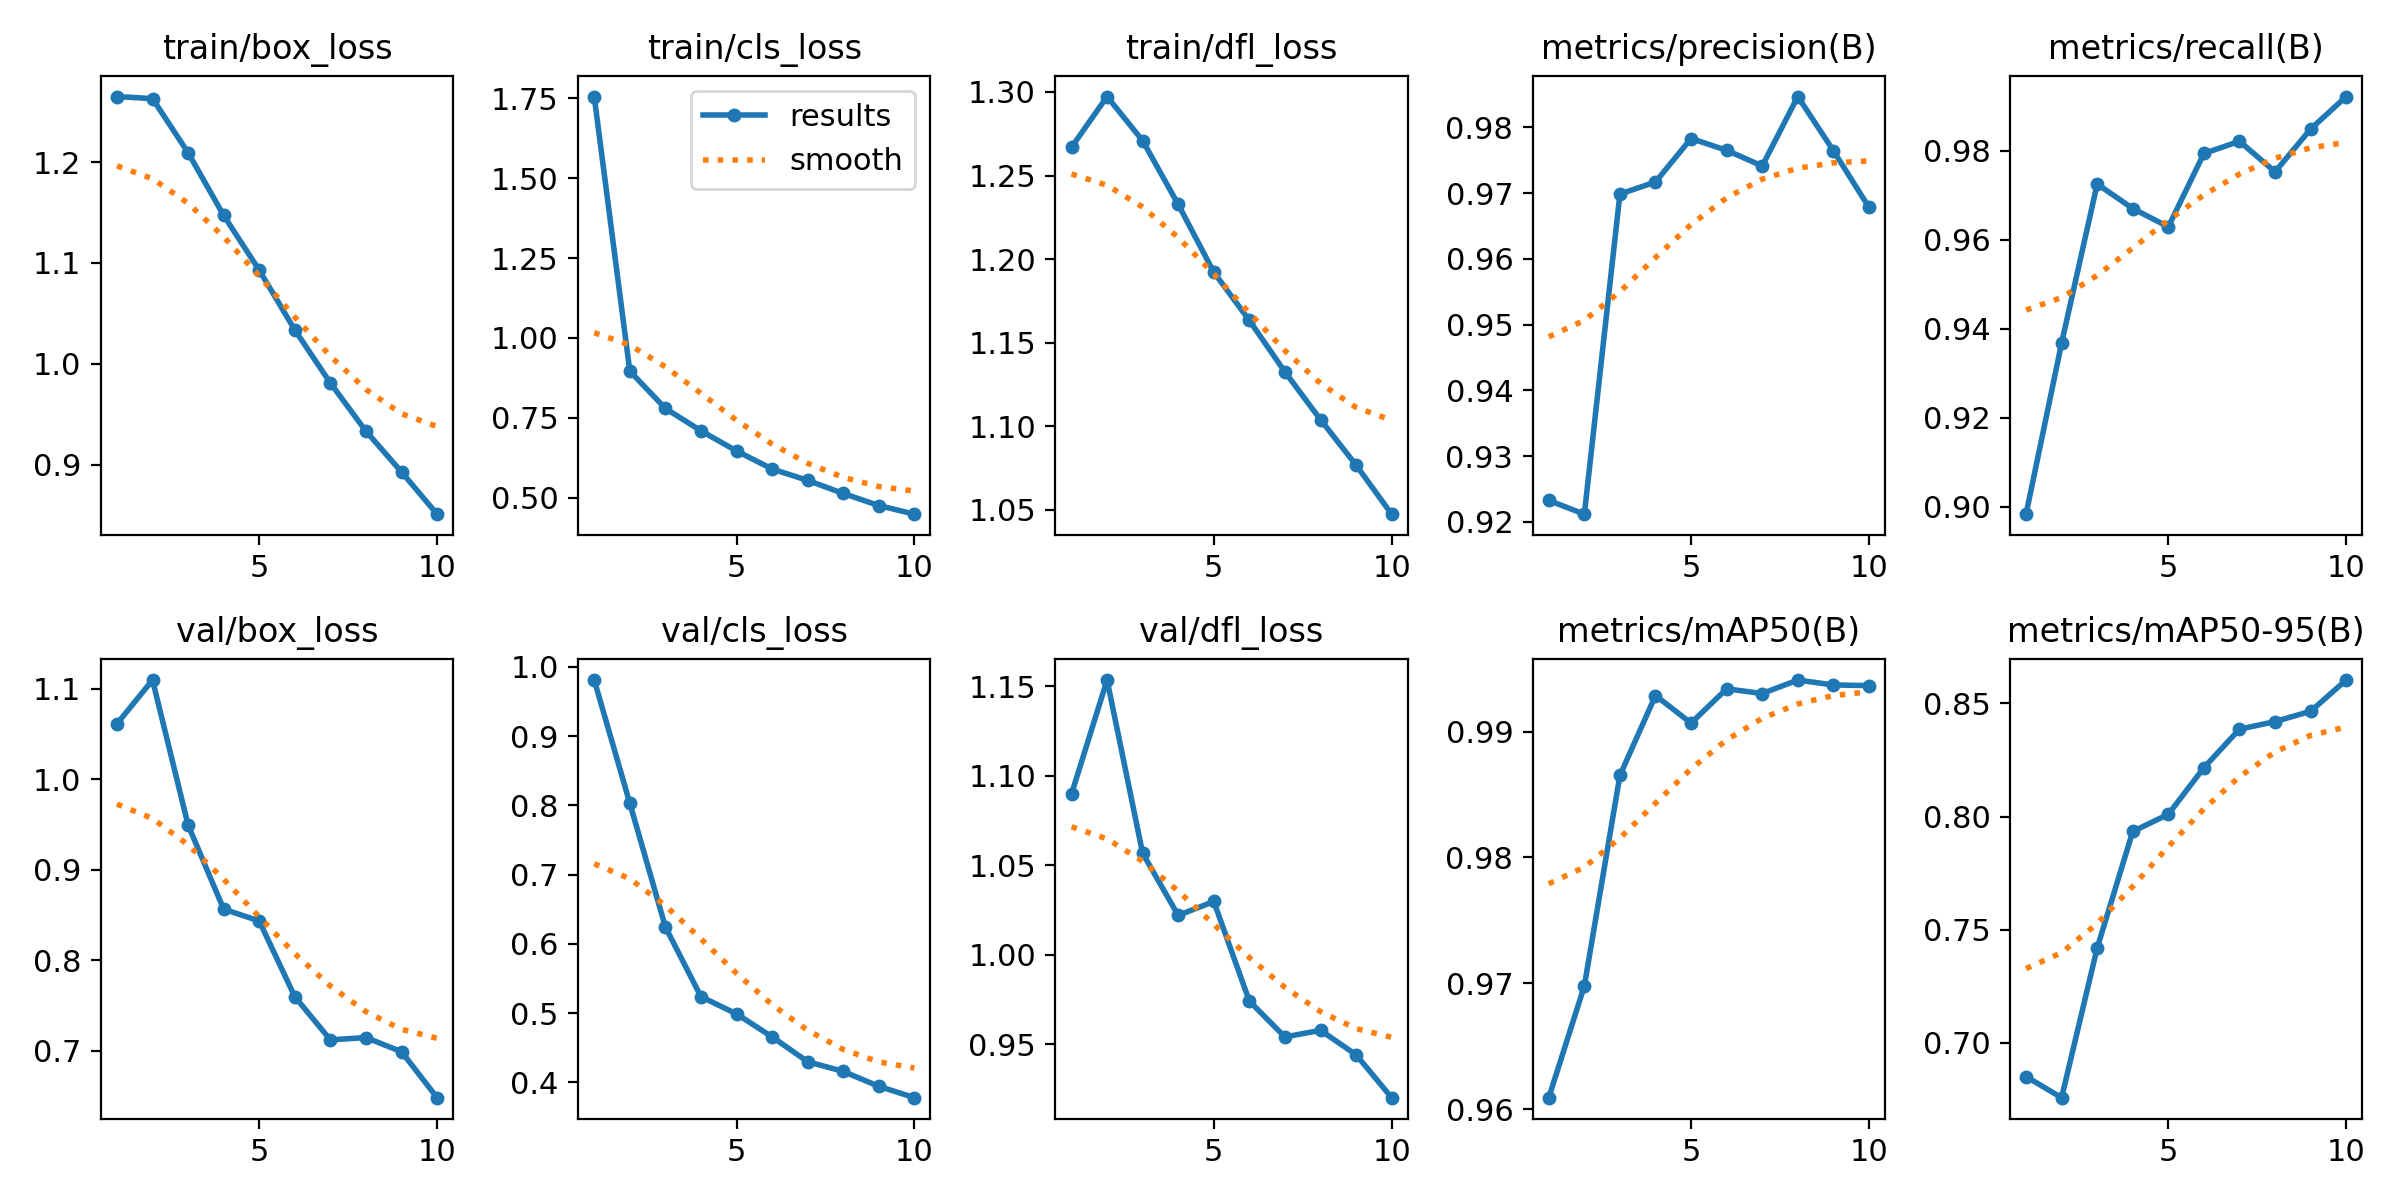

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename='/content/runs/detect/train/results.png', width=800)

In [ ]:
import pandas as pd

csv_path = '/content/runs/detect/train/results.csv'
df_results = pd.read_csv(csv_path)

In [ ]:
min_values = df_results.min()
max_values = df_results.max()

In [ ]:
summary_df = pd.DataFrame({'Mínimo': min_values, 'Máximo': max_values})
summary_df

,Mínimo,Máximo
epoch,1.000000,10.000000
time,344.999000,3323.850000
train/box_loss,0.850880,1.265040
train/cls_loss,0.448180,1.755410
train/dfl_loss,1.047500,1.297250
metrics/precision(B),0.921170,0.984680
metrics/recall(B),0.898350,0.992190
metrics/mAP50(B),0.960910,0.994100
metrics/mAP50-95(B),0.675830,0.860270
val/box_loss,0.648300,1.109450


In [ ]:
dif_box_loss = summary_df.loc['train/box_loss',
                              'Mínimo'] - summary_df.loc['val/box_loss', 'Mínimo']
print("dif_box_loss = ", dif_box_loss)

dif_cls_loss = summary_df.loc['train/cls_loss',
                              'Mínimo'] - summary_df.loc['val/cls_loss', 'Mínimo']
print("dif_cls_loss = ", dif_cls_loss)

dif_dfl_loss = summary_df.loc['train/dfl_loss',
                              'Mínimo'] - summary_df.loc['val/dfl_loss', 'Mínimo']
print("dif_dfl_loss = ", dif_dfl_loss)


dif_box_loss =  0.20257999999999998
dif_cls_loss =  0.07039000000000001
dif_dfl_loss =  0.12747000000000008


En este caso tenemos que para un valor que debe ser menor en el entrenamiento que en la validación la diferencia nos da positiva, por lo que tenemos una diferencia inversa y por lo tanto, un posible underfiting.

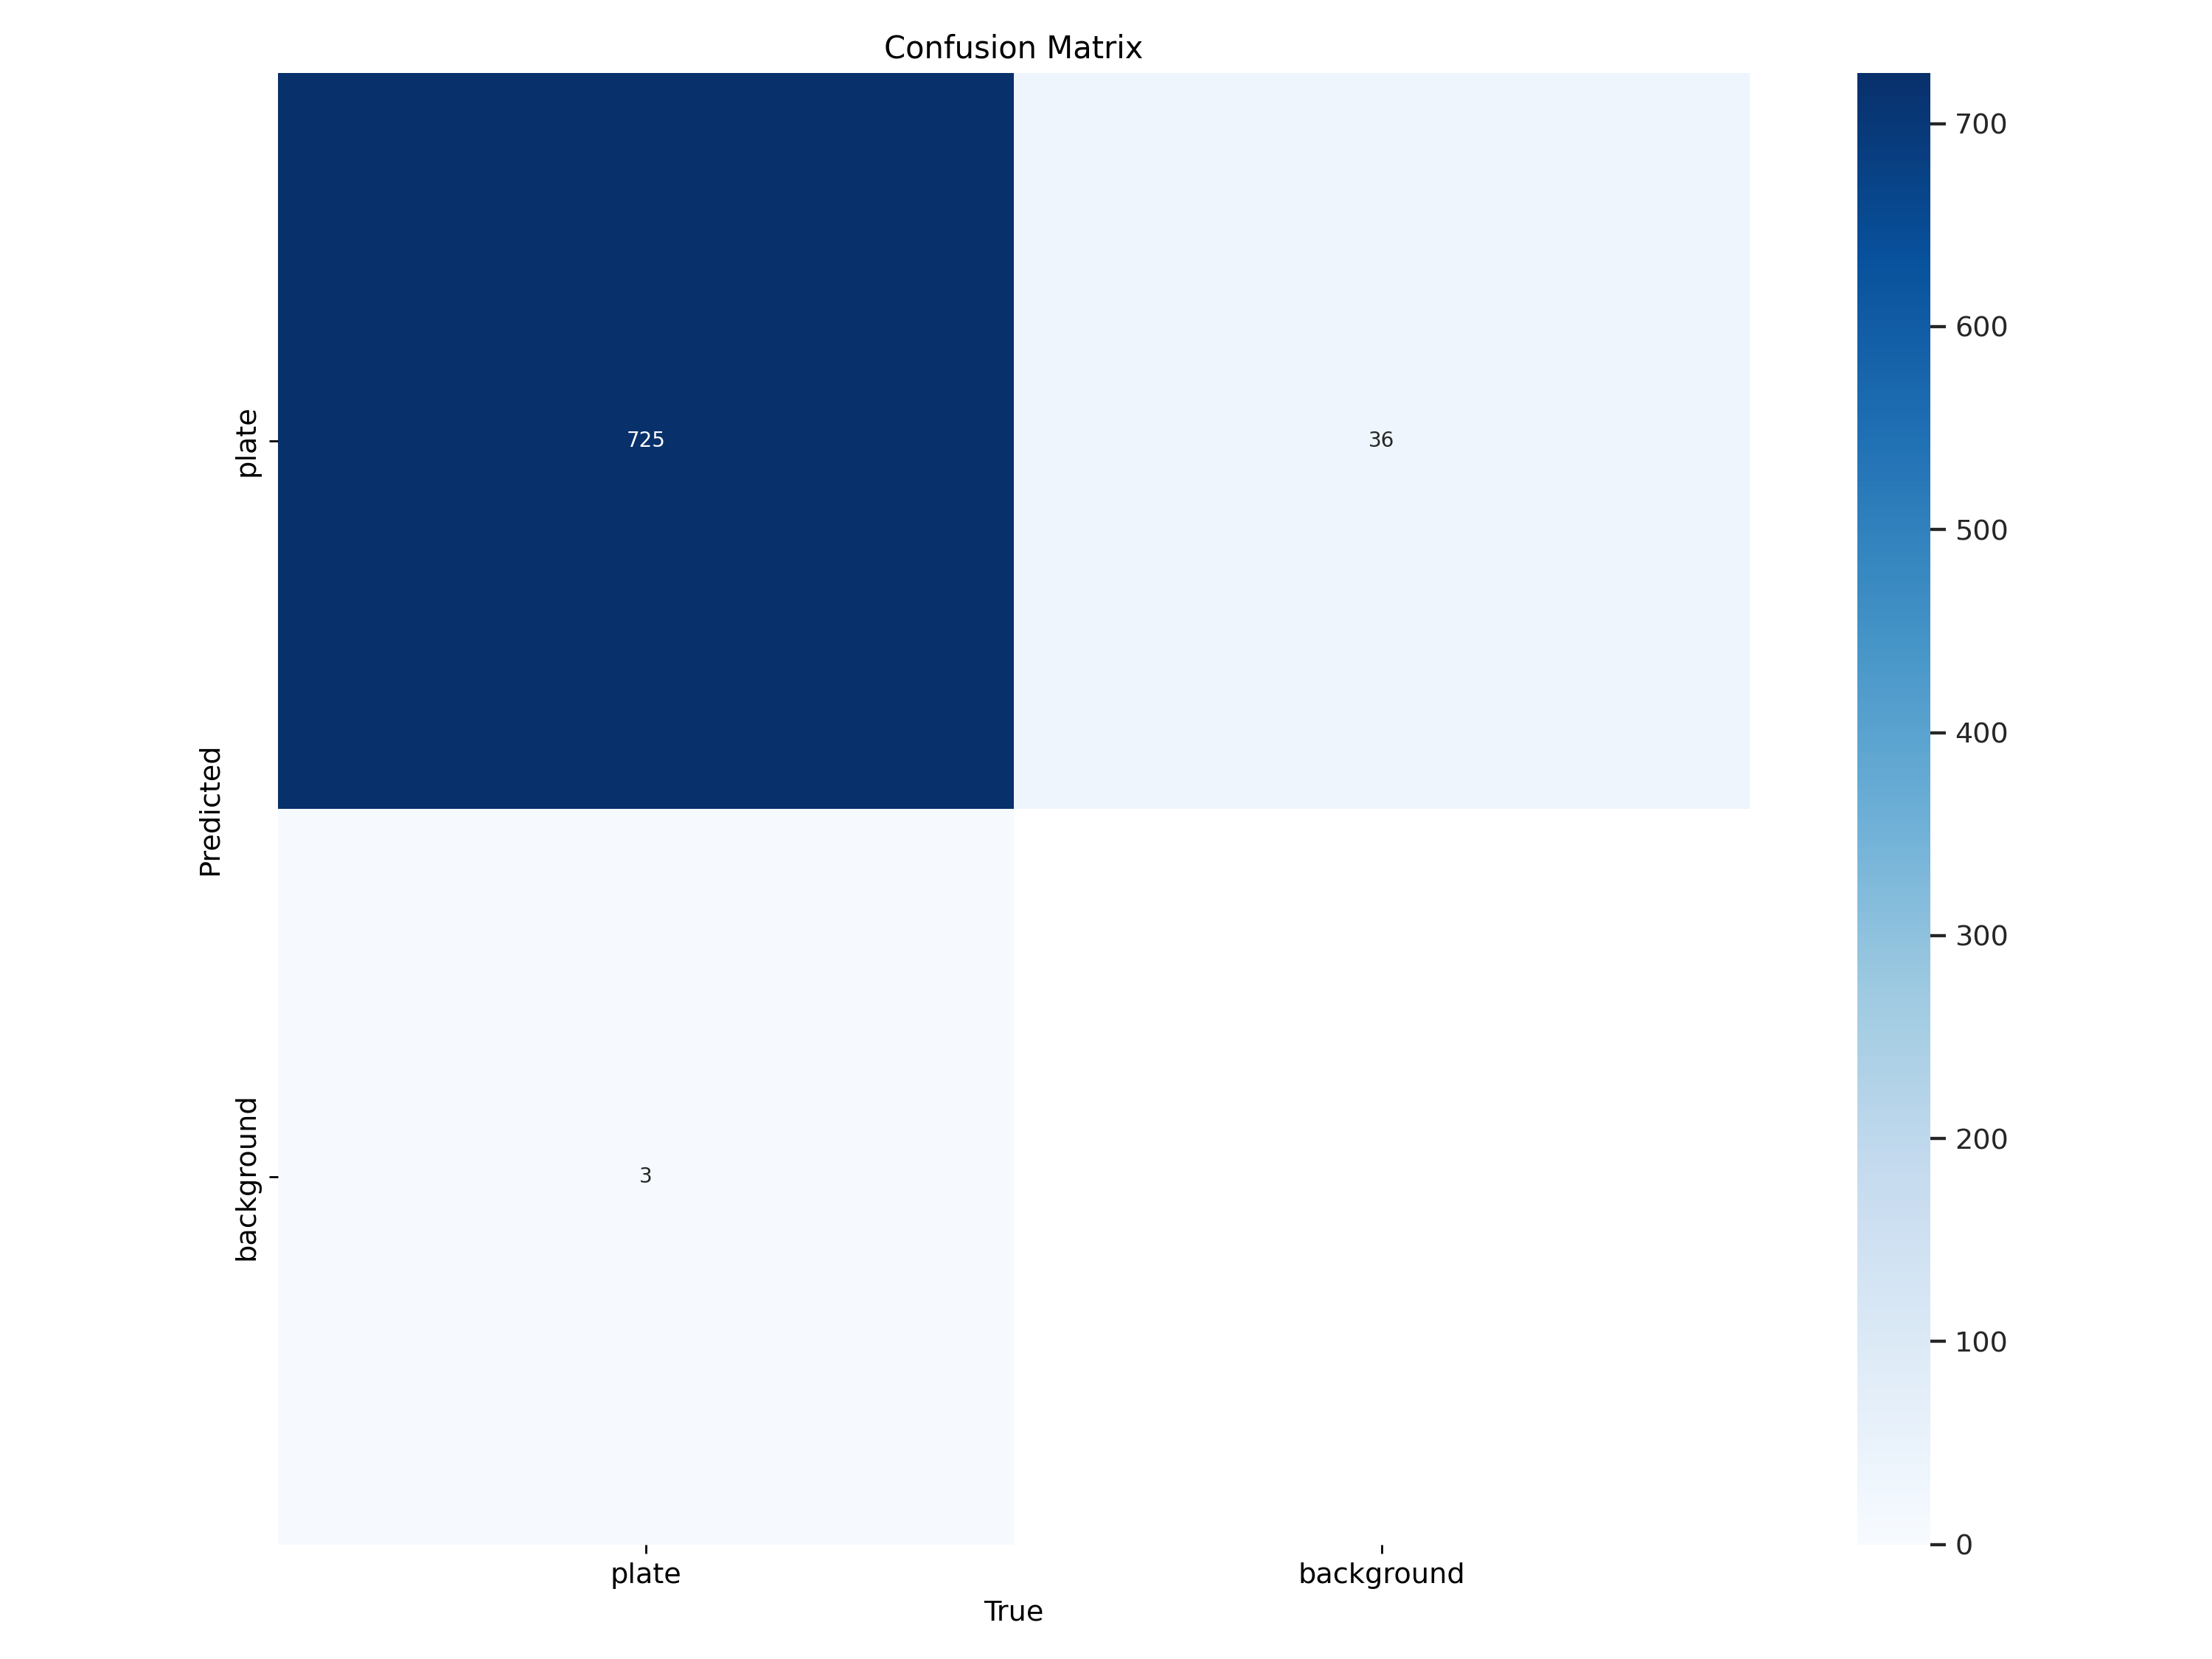

In [ ]:
IPyImage(filename='/content/runs/detect/train/confusion_matrix.png', width=600)

Cargamos el mejor modelo de YOLO luego de aplicar el Fine-Tuning anterior:

In [ ]:
model = YOLO ('/content/runs/detect/train/weights/best.pt')

In [ ]:
preds = model('/content/datasets/Placas_Vehiculares.v2i.yolov11/test/images')


image 1/461 /content/datasets/Placas_Vehiculares/test/images/1-2-_jpg.rf.b19ff5421247dad4cc5f0c6bf341f59b.jpg: 640x640 1 plate, 10.0ms
image 2/461 /content/datasets/Placas_Vehiculares/test/images/1-71-_jpg.rf.67d1f9c3766e04eed23b6914981710cc.jpg: 640x640 1 plate, 9.0ms
image 3/461 /content/datasets/Placas_Vehiculares/test/images/1-82-_jpg.rf.8a469fd1785305c4a186791acfcc4620.jpg: 640x640 1 plate, 9.0ms
image 4/461 /content/datasets/Placas_Vehiculares/test/images/102_jpg.rf.9a378ab198d9bcfd73a908c589933917.jpg: 640x640 1 plate, 8.5ms
image 5/461 /content/datasets/Placas_Vehiculares/test/images/1121RTN-CAP-Sansusti-111-_jpg.rf.0e03b505bbb0fce28d95f96eb0cf2ca4.jpg: 640x640 1 plate, 9.0ms
image 6/461 /content/datasets/Placas_Vehiculares/test/images/1121RTN-CAP-Sansusti-115-_jpg.rf.5843f52f580065cc05174c23a228f418.jpg: 640x640 1 plate, 8.3ms
image 7/461 /content/datasets/Placas_Vehiculares/test/images/1121RTN-CAP-Sansusti-117-_jpg.rf.581b2882946b46ceabdfe4b235b0aee4.jpg: 640x640 1 plate, 8.

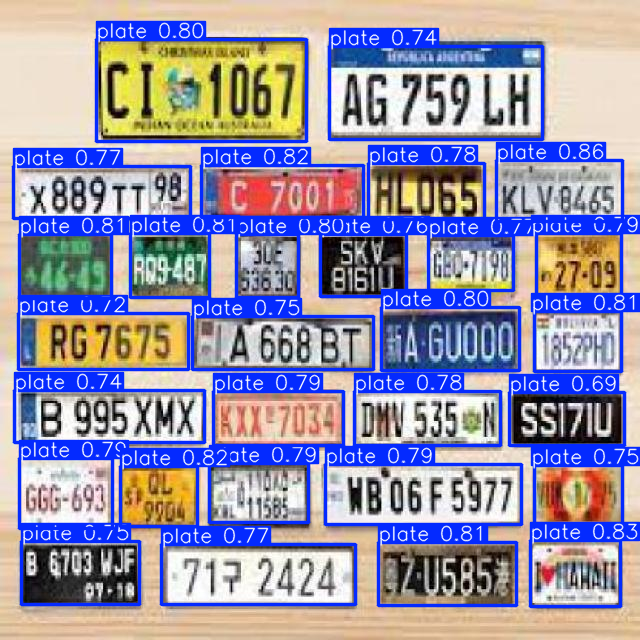

In [ ]:
preds[402].show()

En el segundo intento detecta mejor donde hay varias placas sin embargo, puede acabar detectando placas en lugares cuadrados donde no hay texto.